### Titanic dataset to predict the survival of pessanger 

In [1]:
#Logistic Regression is a classification technique used to find class of dependent variable 1 as True and 0 as False

### Import Libraries

In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.linear_model import LogisticRegression
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings(action='ignore')

In [3]:
df=pd.read_csv('Titanic.csv')

In [4]:
df.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


In [5]:
df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [6]:
len(df)

891

In [7]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


### Check Null Value

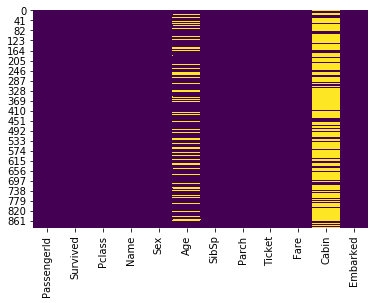

In [8]:
sns.heatmap(df.isnull(),cbar=False,cmap='viridis')

In [9]:
df[df.isnull()==False].count()

PassengerId    891
Survived       891
Pclass         891
Name           891
Sex            891
Age            714
SibSp          891
Parch          891
Ticket         891
Fare           891
Cabin          204
Embarked       889
dtype: int64

In [10]:
mean_age=np.mean(df['Age'])

### Fill Null/NaN value with mean value

In [11]:
df['Age']=df['Age'].fillna(mean_age)

### Convert the categorical variables to dummy variables

In [12]:
Sex=pd.get_dummies(df['Sex'],drop_first=True)
Embarked=pd.get_dummies(df['Embarked'],drop_first=True)

In [13]:
df.drop(['Sex','Embarked','Name','Ticket','Cabin'],axis=True,inplace=True)

In [14]:
df=pd.concat([df,Sex,Embarked],axis=1)

In [15]:
df.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,1,0,3,22.0,1,0,7.2500,1,0,1
1,2,1,1,38.0,1,0,71.2833,0,0,0
2,3,1,3,26.0,0,0,7.9250,0,0,1
3,4,1,1,35.0,1,0,53.1000,0,0,1
4,5,0,3,35.0,0,0,8.0500,1,0,1


###  Heatmap Post Data Cleaning for Age feature


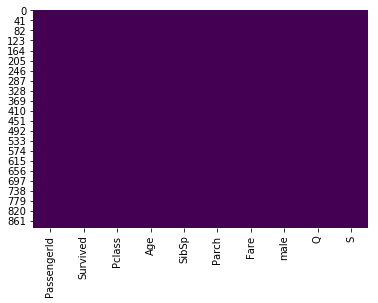

In [16]:
sns.heatmap(df.isnull(),cbar=False,cmap='viridis')

### Independent and dependent variables seperation

In [17]:
X=df.loc[:,df.columns!='Survived']

In [30]:
X.head()

,PassengerId,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,1,3,22.0,1,0,7.2500,1,0,1
1,2,1,38.0,1,0,71.2833,0,0,0
2,3,3,26.0,0,0,7.9250,0,0,1
3,4,1,35.0,1,0,53.1000,0,0,1
4,5,3,35.0,0,0,8.0500,1,0,1


In [18]:
y=df['Survived']

In [19]:
X_train,X_test,y_train,y_test=train_test_split(X,y,train_size=0.20,random_state=11)

### Create object of Logistic Regression

In [20]:
Logist=LogisticRegression()

### Train the training set  

In [21]:
Logist.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [22]:
y_predict=Logist.predict(X_test)

### Classification Report

In [23]:
print(classification_report(y_test,y_predict))

              precision    recall  f1-score   support

           0       0.80      0.90      0.85       440
           1       0.80      0.64      0.71       273

   micro avg       0.80      0.80      0.80       713
   macro avg       0.80      0.77      0.78       713
weighted avg       0.80      0.80      0.79       713



### Confusion Matrix

In [24]:
cm=confusion_matrix(y_test,y_predict)

In [25]:
print(cm)

[[395  45]
 [ 98 175]]


In [26]:
True_Positive=cm[0][0]
False_Positive=cm[0][1]
True_Negative=cm[1][1]
False_Negative=cm[1][0]

In [27]:
print('True_Positive is {} '.format(True_Positive))
print('True_Negative is {} '.format(True_Negative))
print('False_Positive is {} '.format(False_Positive))
print('False_Negative is {} '.format(False_Negative))

True_Positive is 395 
True_Negative is 175 
False_Positive is 45 
False_Negative is 98 


In [28]:
Accuracy=(True_Positive+True_Negative)/(True_Positive+False_Positive+True_Negative+False_Negative)
print('Accuracy is {} %'.format(Accuracy))

Accuracy is 0.7994389901823282 %


In [29]:
Error_Rate=(False_Positive+False_Negative)/(True_Positive+False_Positive+True_Negative+False_Negative)
print('Error_Rate is {} %'.format(Error_Rate))

Error_Rate is 0.2005610098176718 %
